## Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
dataset = pd.read_csv('adult.csv')

In [2]:
dataset.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
data = dataset

In [4]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
num_col = list(data.describe().columns)
categorical_col = [i for i in data.columns if i not in num_col]

In [7]:
num_col

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [8]:
num_df = data.loc[:,num_col]
num_df

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,25,226802,7,0,0,40
1,38,89814,9,0,0,50
2,28,336951,12,0,0,40
3,44,160323,10,7688,0,40
4,18,103497,10,0,0,30
...,...,...,...,...,...,...
48837,27,257302,12,0,0,38
48838,40,154374,9,0,0,40
48839,58,151910,9,0,0,40
48840,22,201490,9,0,0,20


In [9]:
cat_df = data.loc[:,categorical_col]
cat_df = cat_df.applymap(str)
cat_df.mode()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K


## Plots and Analysis

### PDF

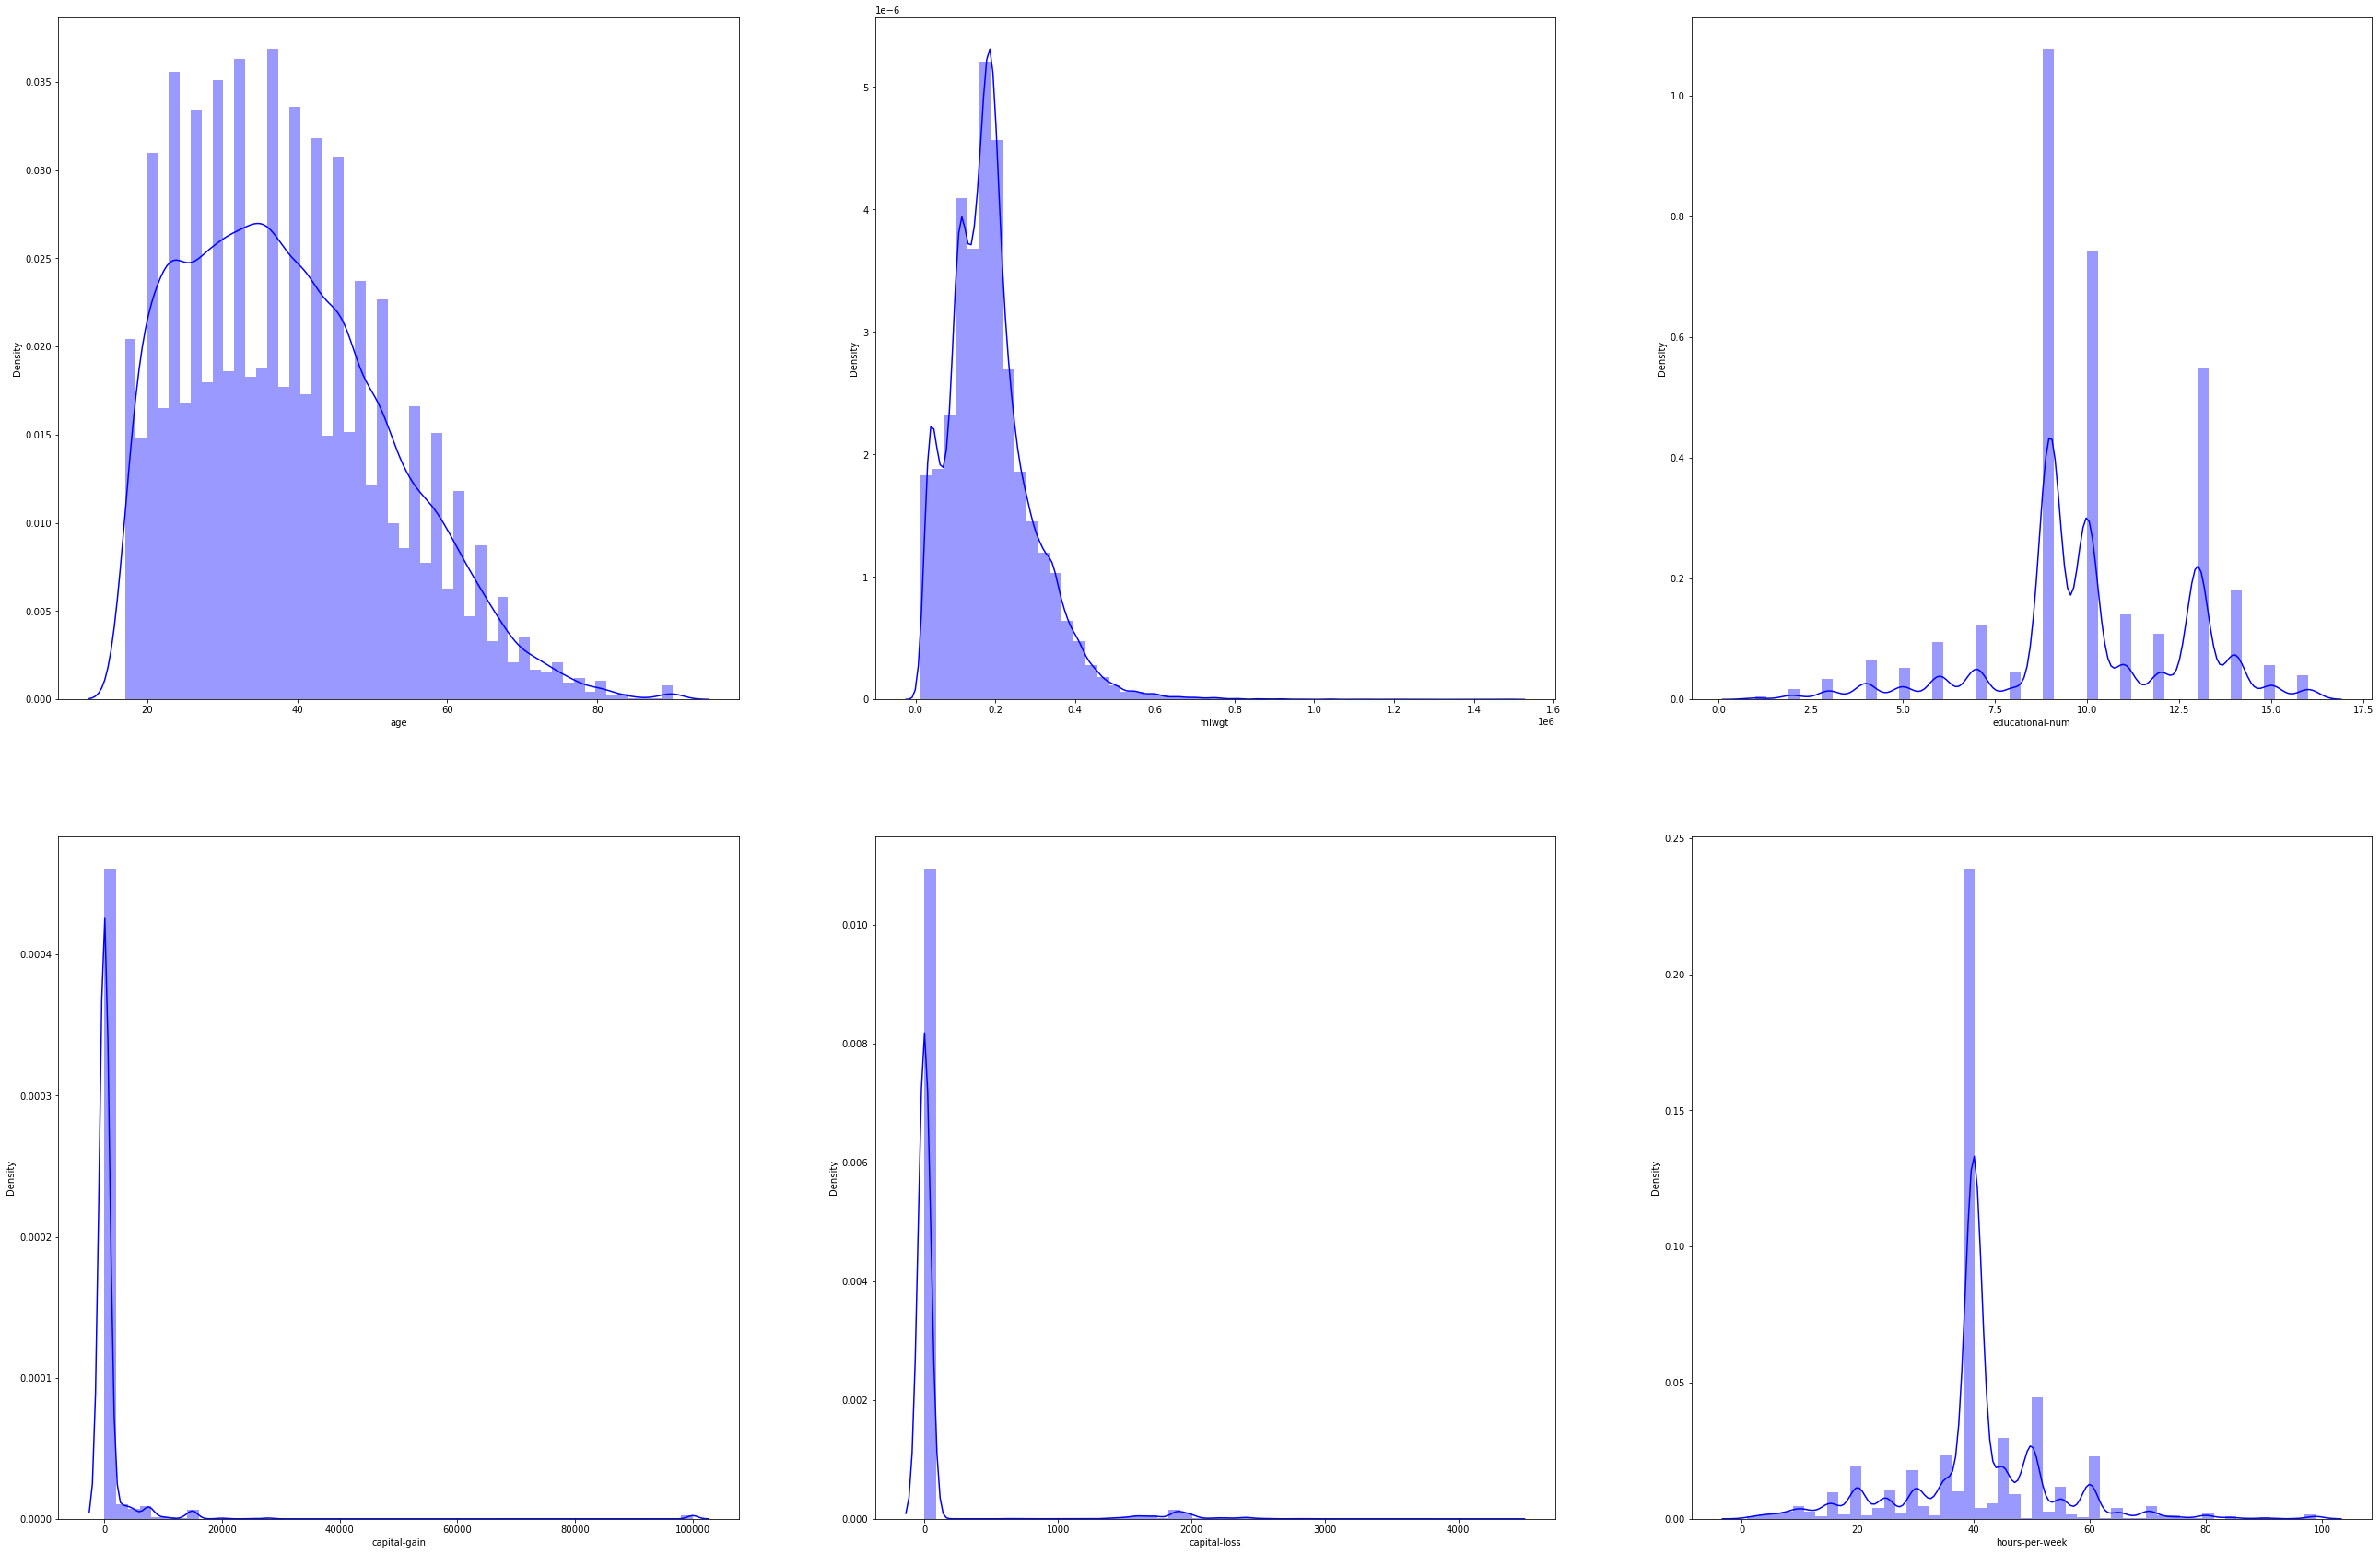

In [18]:
f, ax = plt.subplots(2, 3, sharey=False ,figsize=(45, 30))
j = 0
for i in num_col:
    k = int(j / 3)
    t = j % 3
    sns.distplot(data.loc[:, i], ax=ax[k, t],color='blue',kde=True)
    j+=1

plt.show()

#### Observations :
1. Seems like positively skewed Gaussian distribution 
2. Similar to a log-normal distribution in appearance with peak around 0.2
3. Combination of multiple peaks with 8 being highest
4. Most Capital-gains are 0
5. Most Capital-loss are 0
6. Multiple peaks with 40 being highest

### Histograms

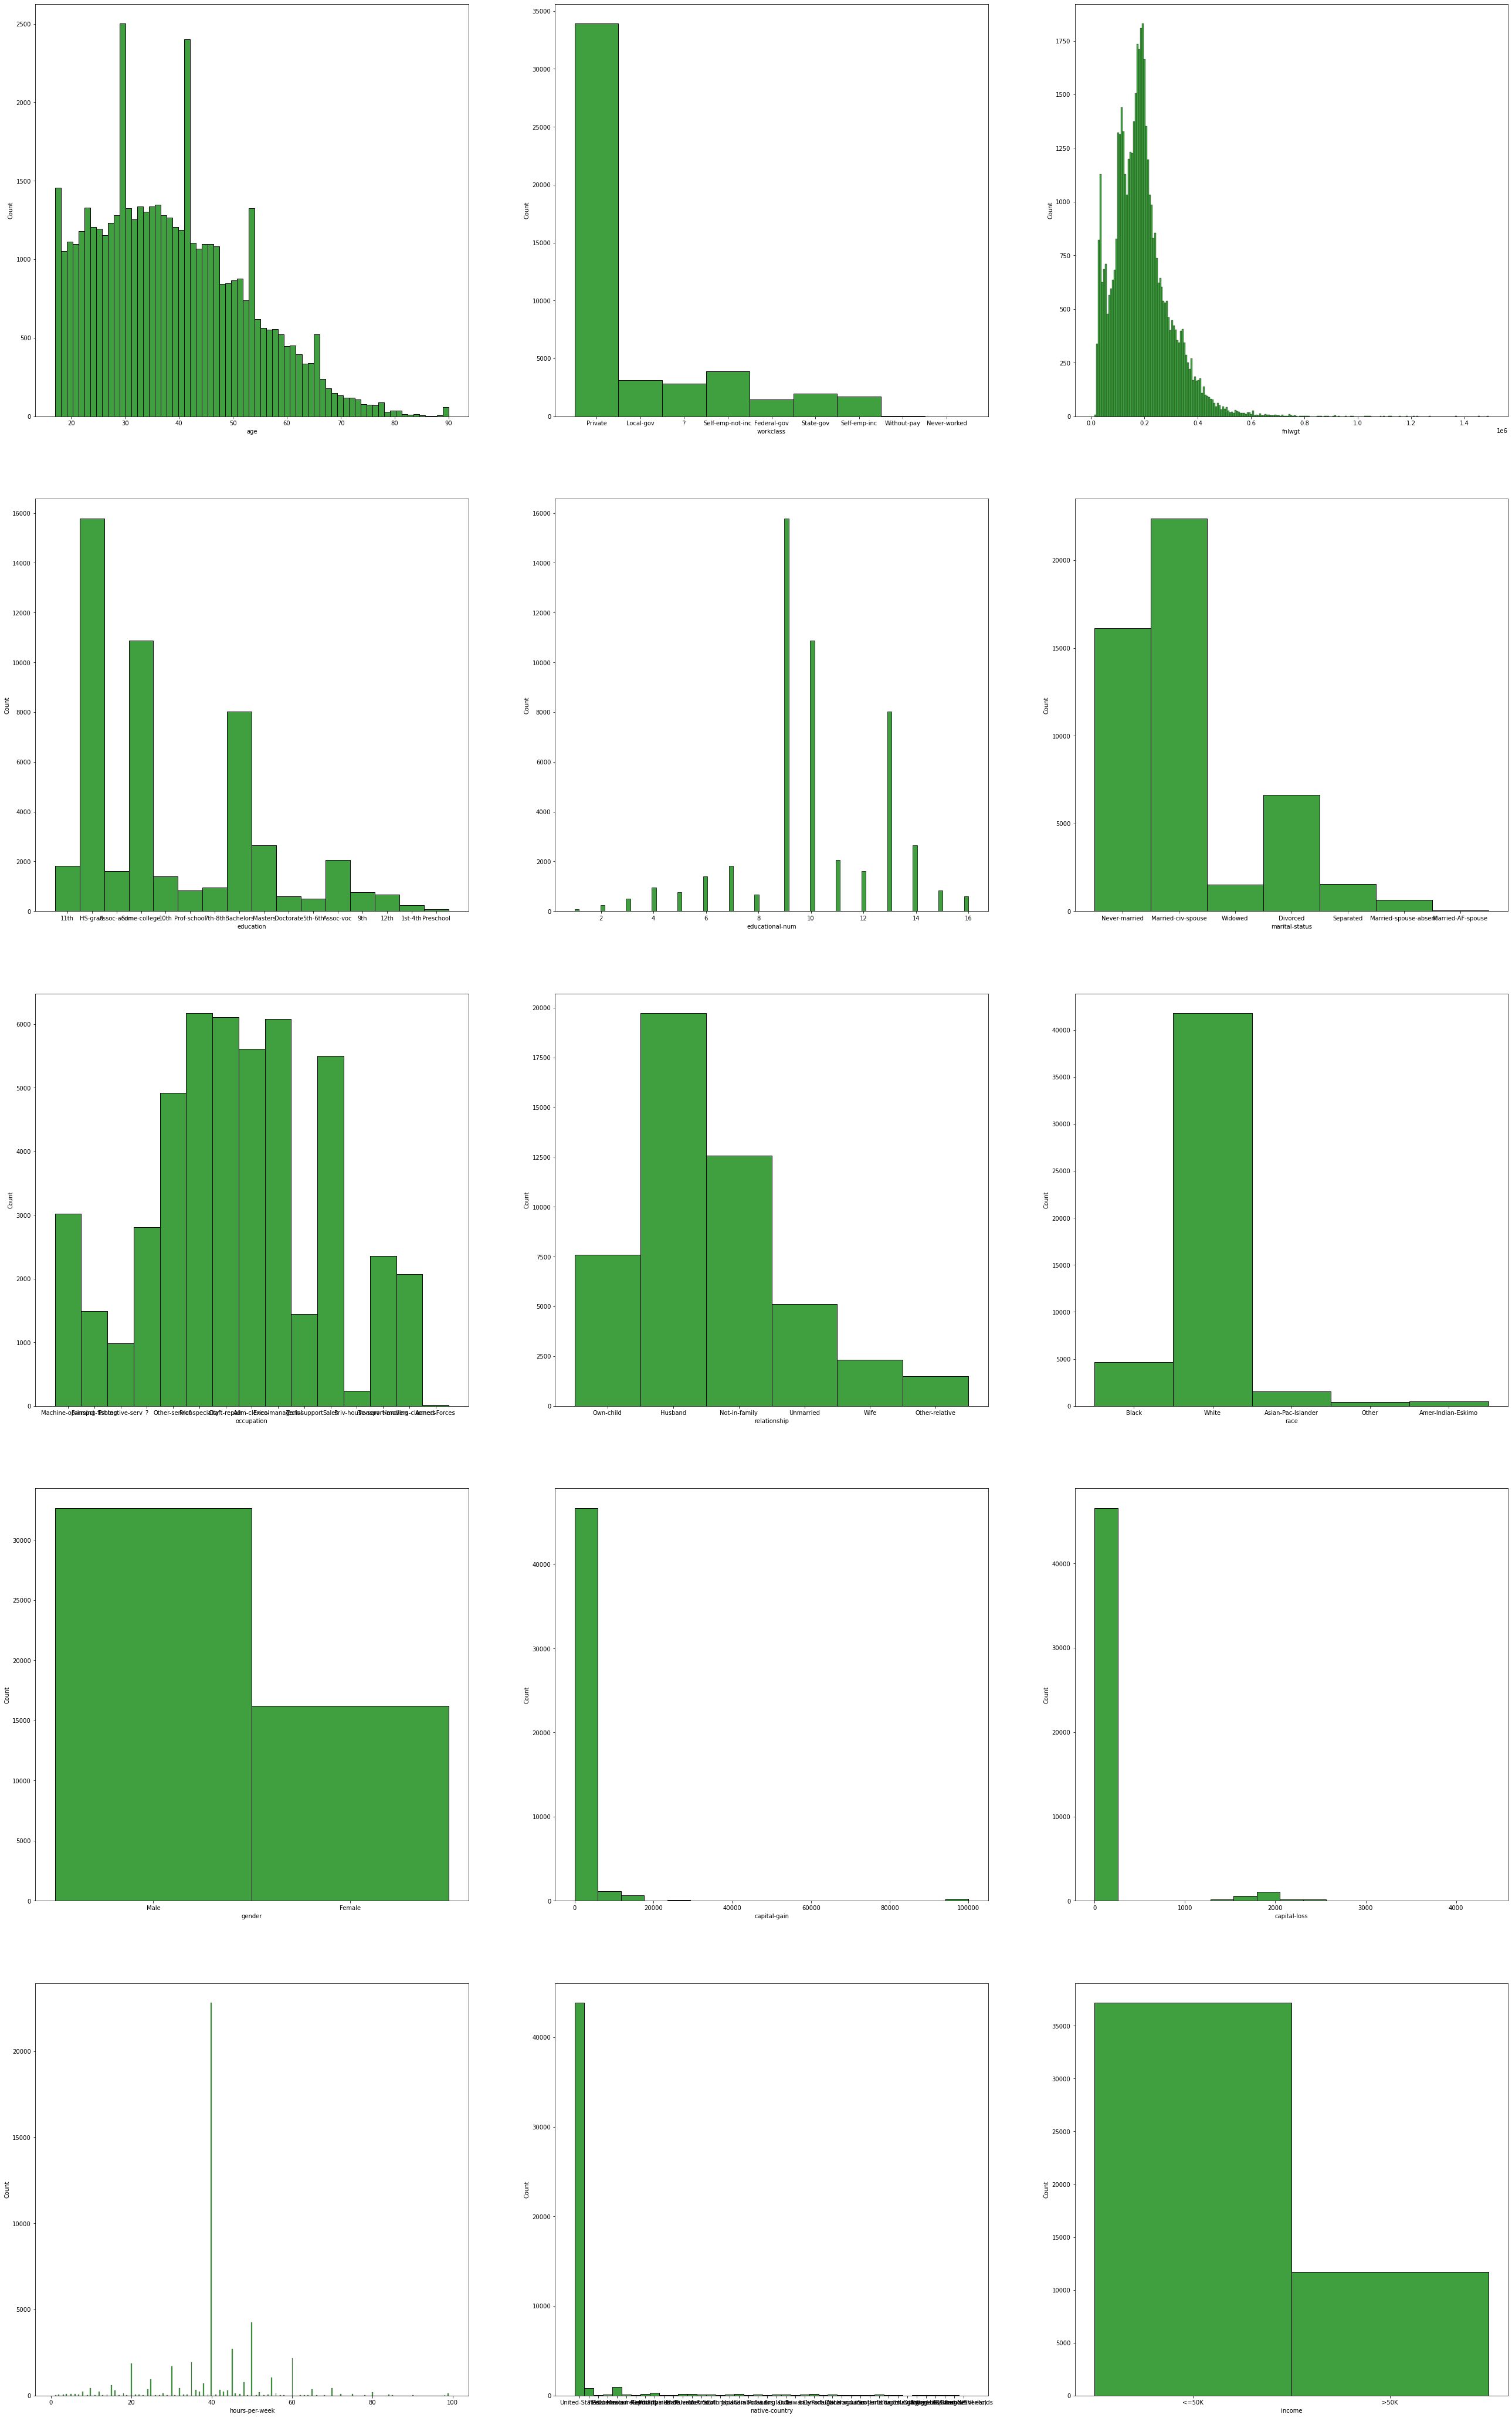

In [12]:
f, ax = plt.subplots(5, 3, sharey=False ,figsize=(45,75))
j = 0
for i in data.columns:
    k = int(j / 3)
    t = j % 3
    sns.histplot(data.loc[:, i], ax=ax[k, t],color='green')
    j+=1

plt.show()

### Boxplots

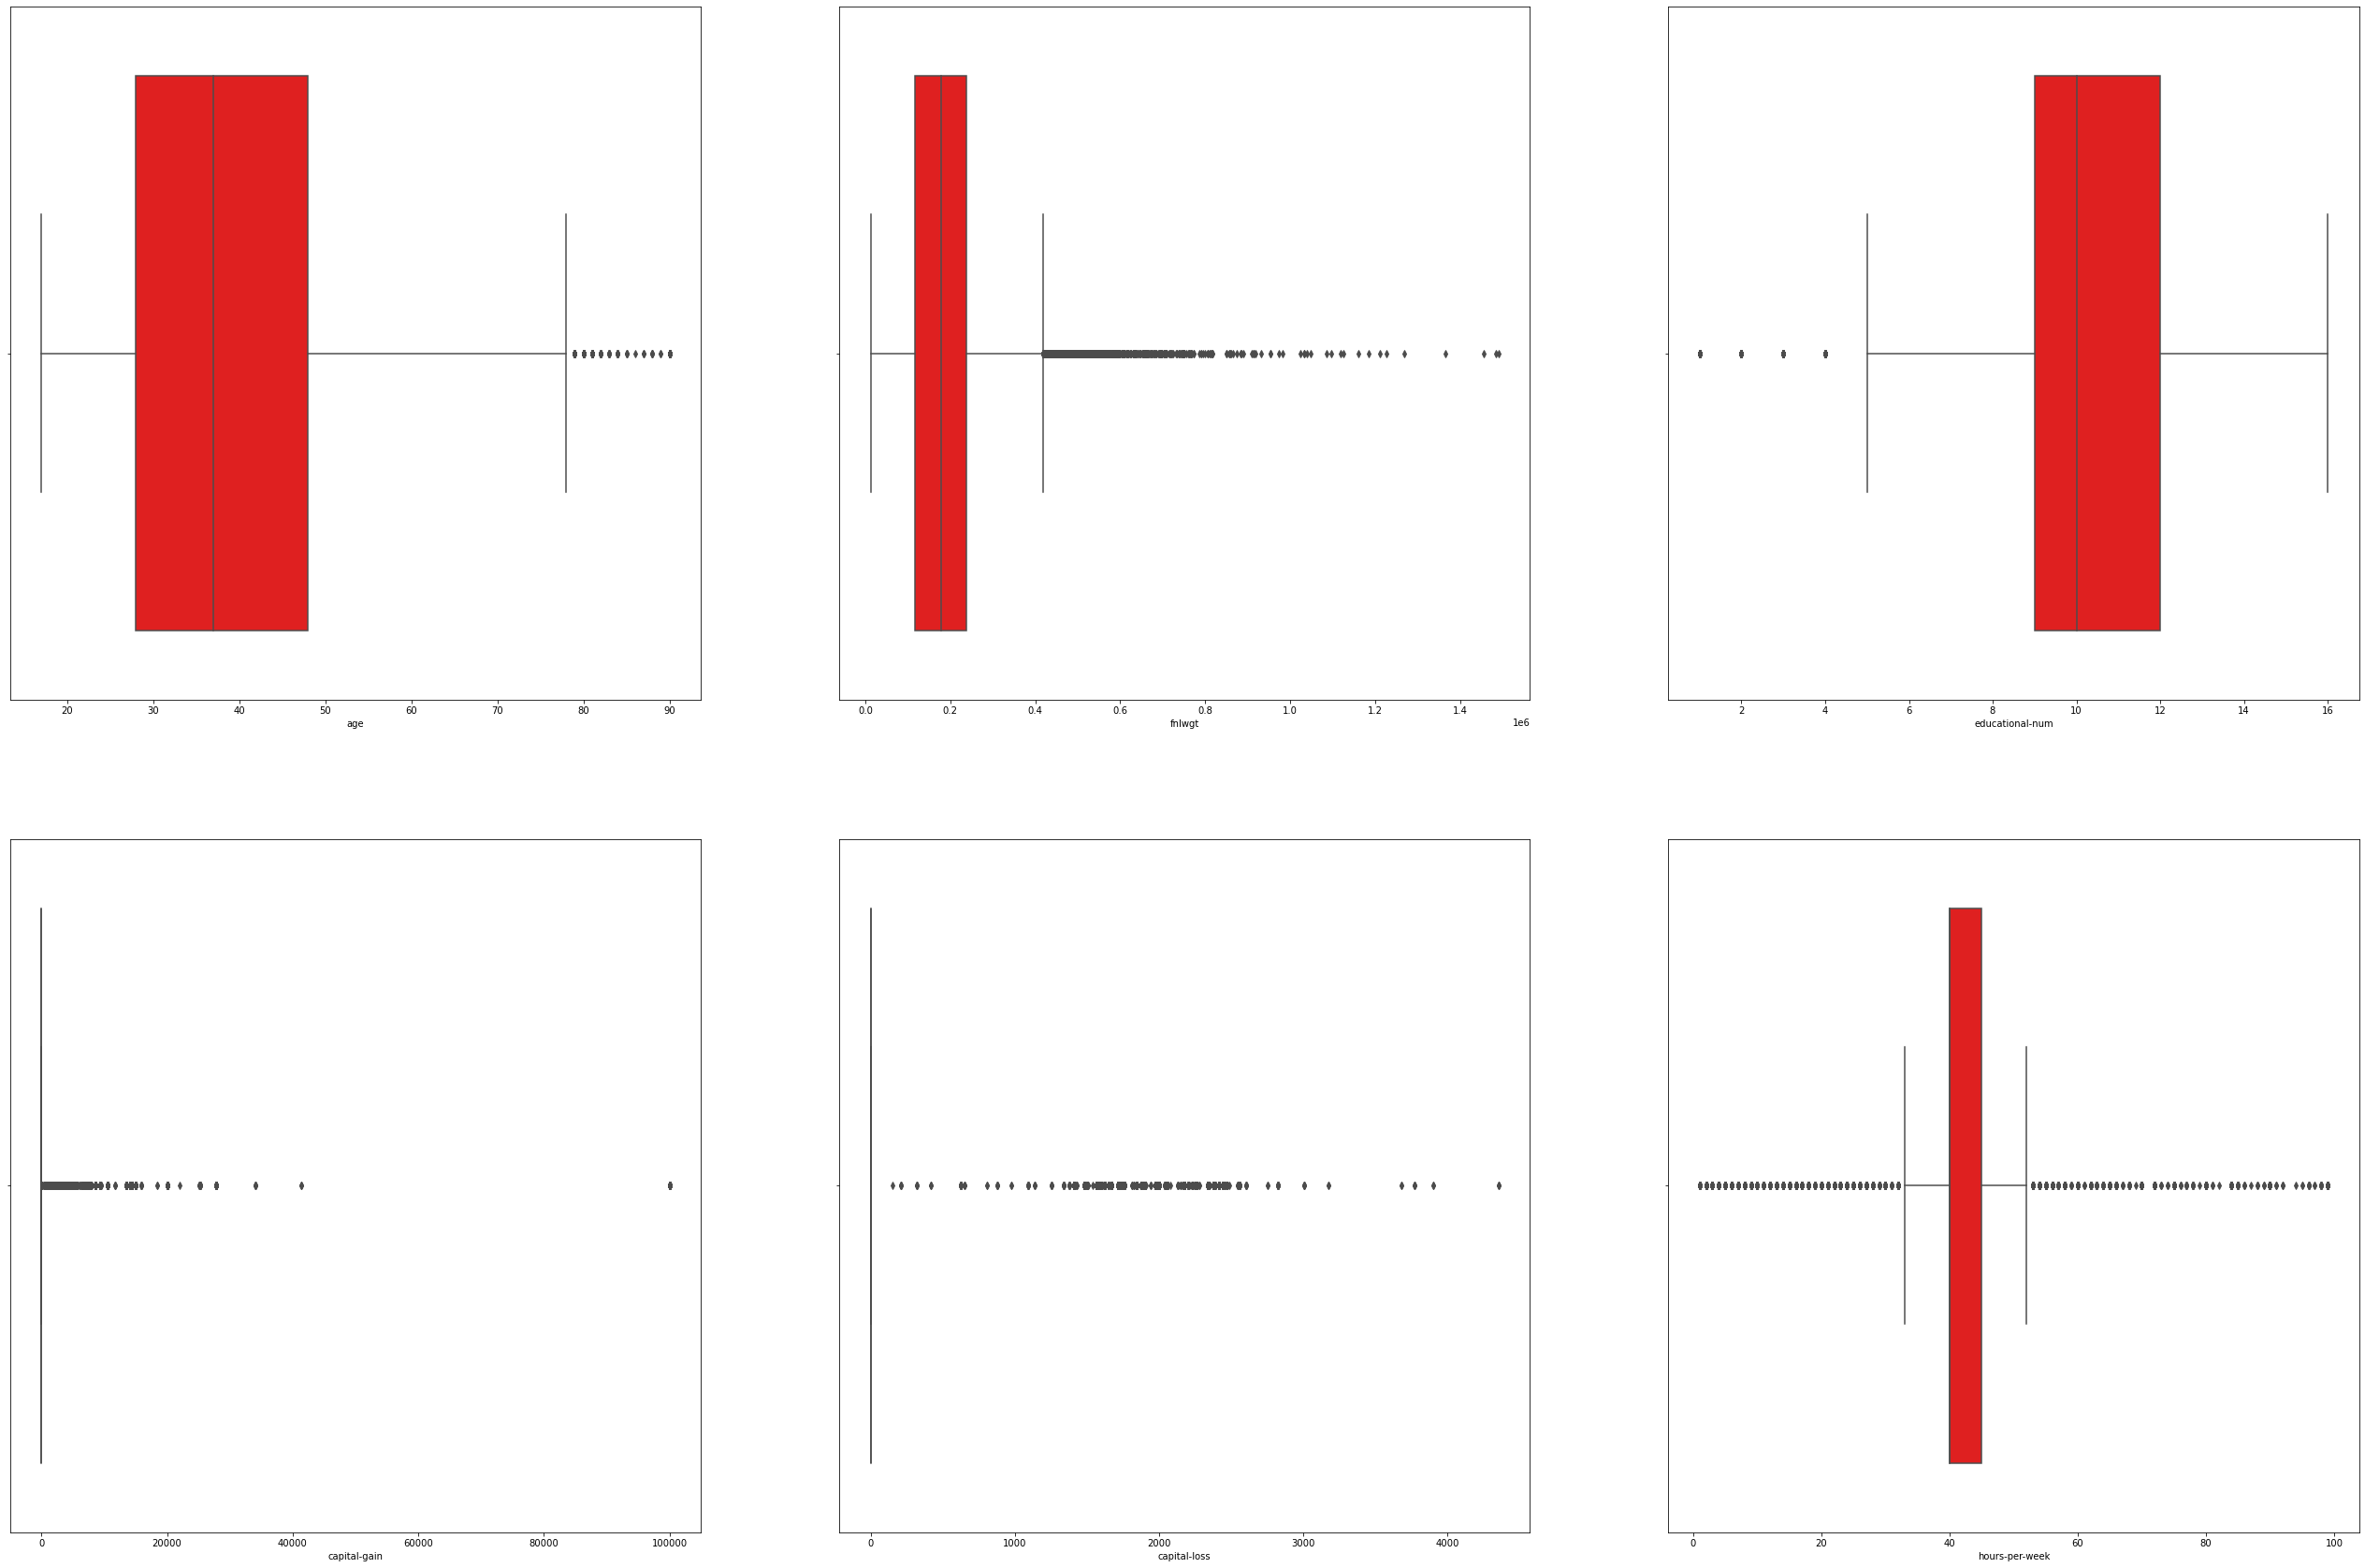

In [13]:
f, ax = plt.subplots(2, 3, sharey=False ,figsize=(45, 30))
j = 0
for i in num_col:
    k = int(j / 3)
    t = j % 3
    sns.boxplot(data.loc[:, i], ax=ax[k, t],color='red')
    j+=1

plt.show()

#### We can clearly see multiple outliers in multiple columns and 4 outliers in educational - num (1,2,3,4)

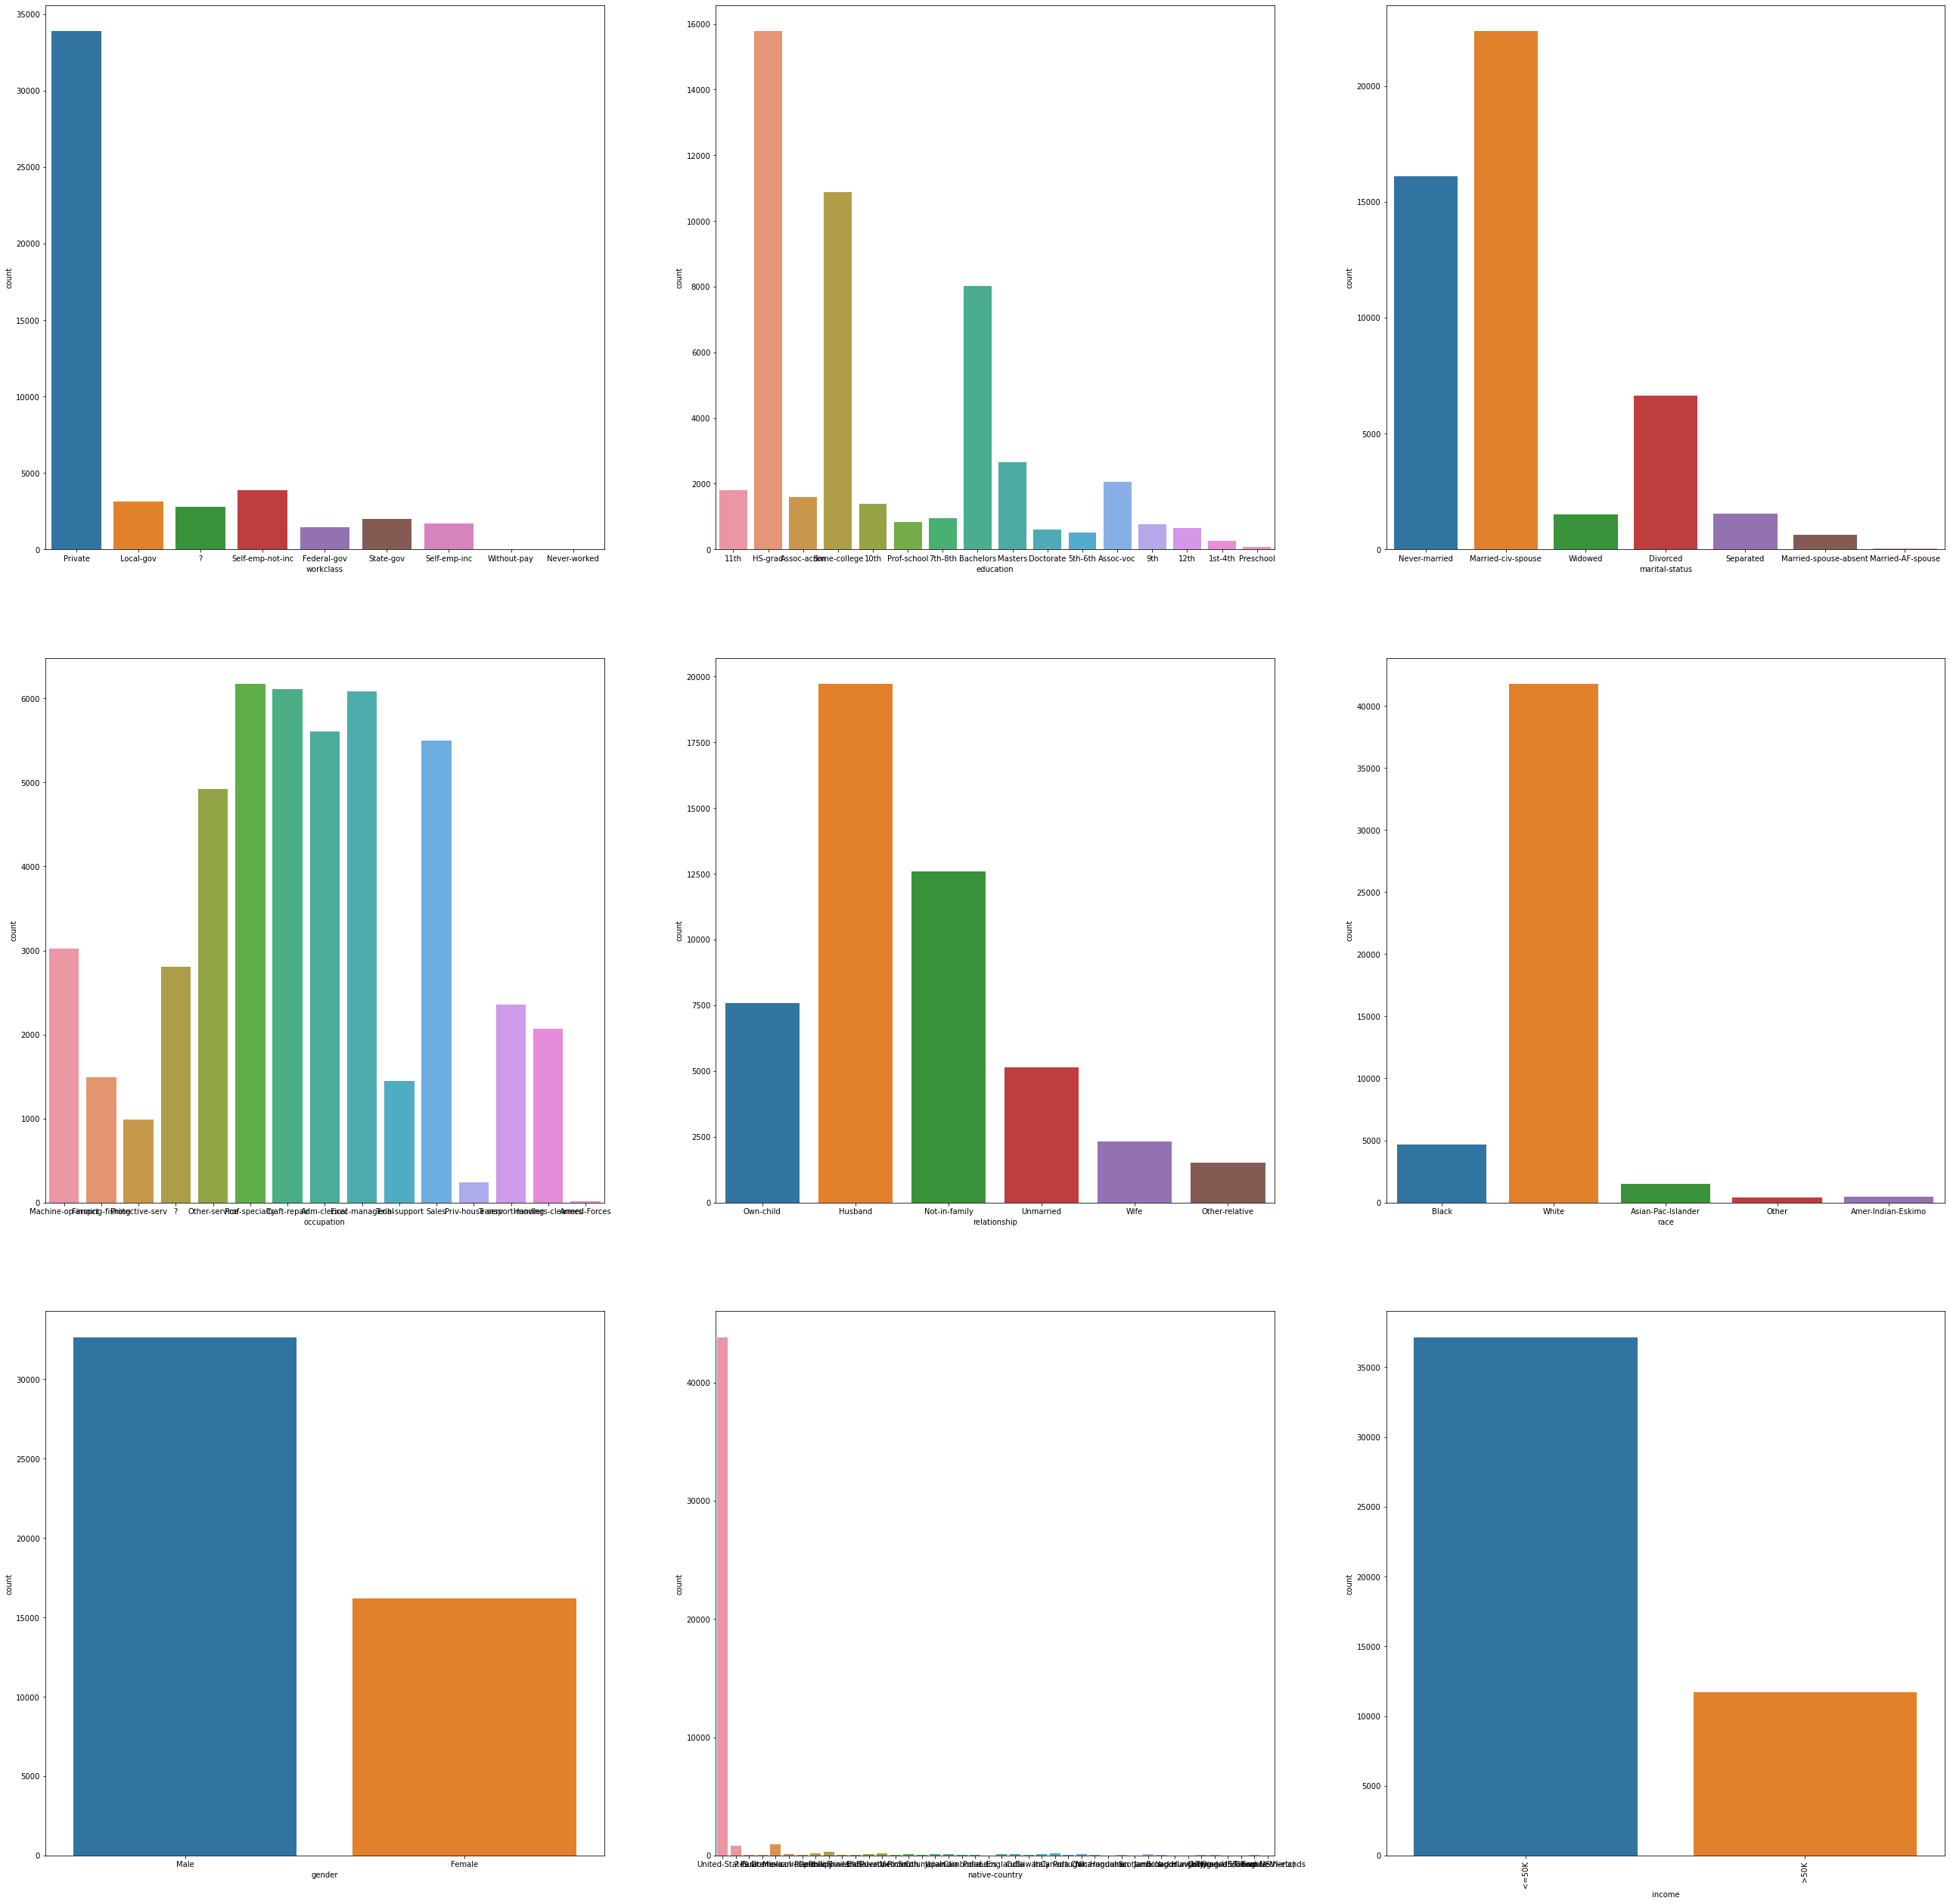

In [19]:
f, ax = plt.subplots(3,3, sharey=False ,figsize=(45, 45))
j = 0
for i in cat_df.columns:

    k = int(j / 3)
    t = j % 3
    sns.countplot(data.loc[:, i], ax=ax[k, t])
    plt.xticks(rotation=90)
    j+=1


plt.show()

#### As the graph for native country is highly biased , a graph for top 10 entries has been plotted below

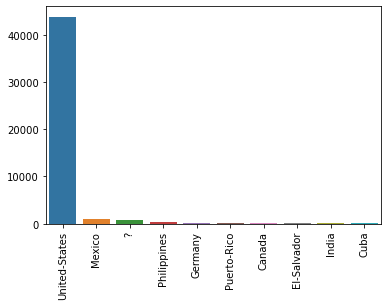

In [20]:
sns.barplot(cat_df.loc[:,'native-country'].value_counts()[:10].index,data.loc[:,'native-country'].value_counts()[:10].values)
plt.xticks(rotation=90)

plt.show()

#### Represents numerical columns v/s target value boxplots

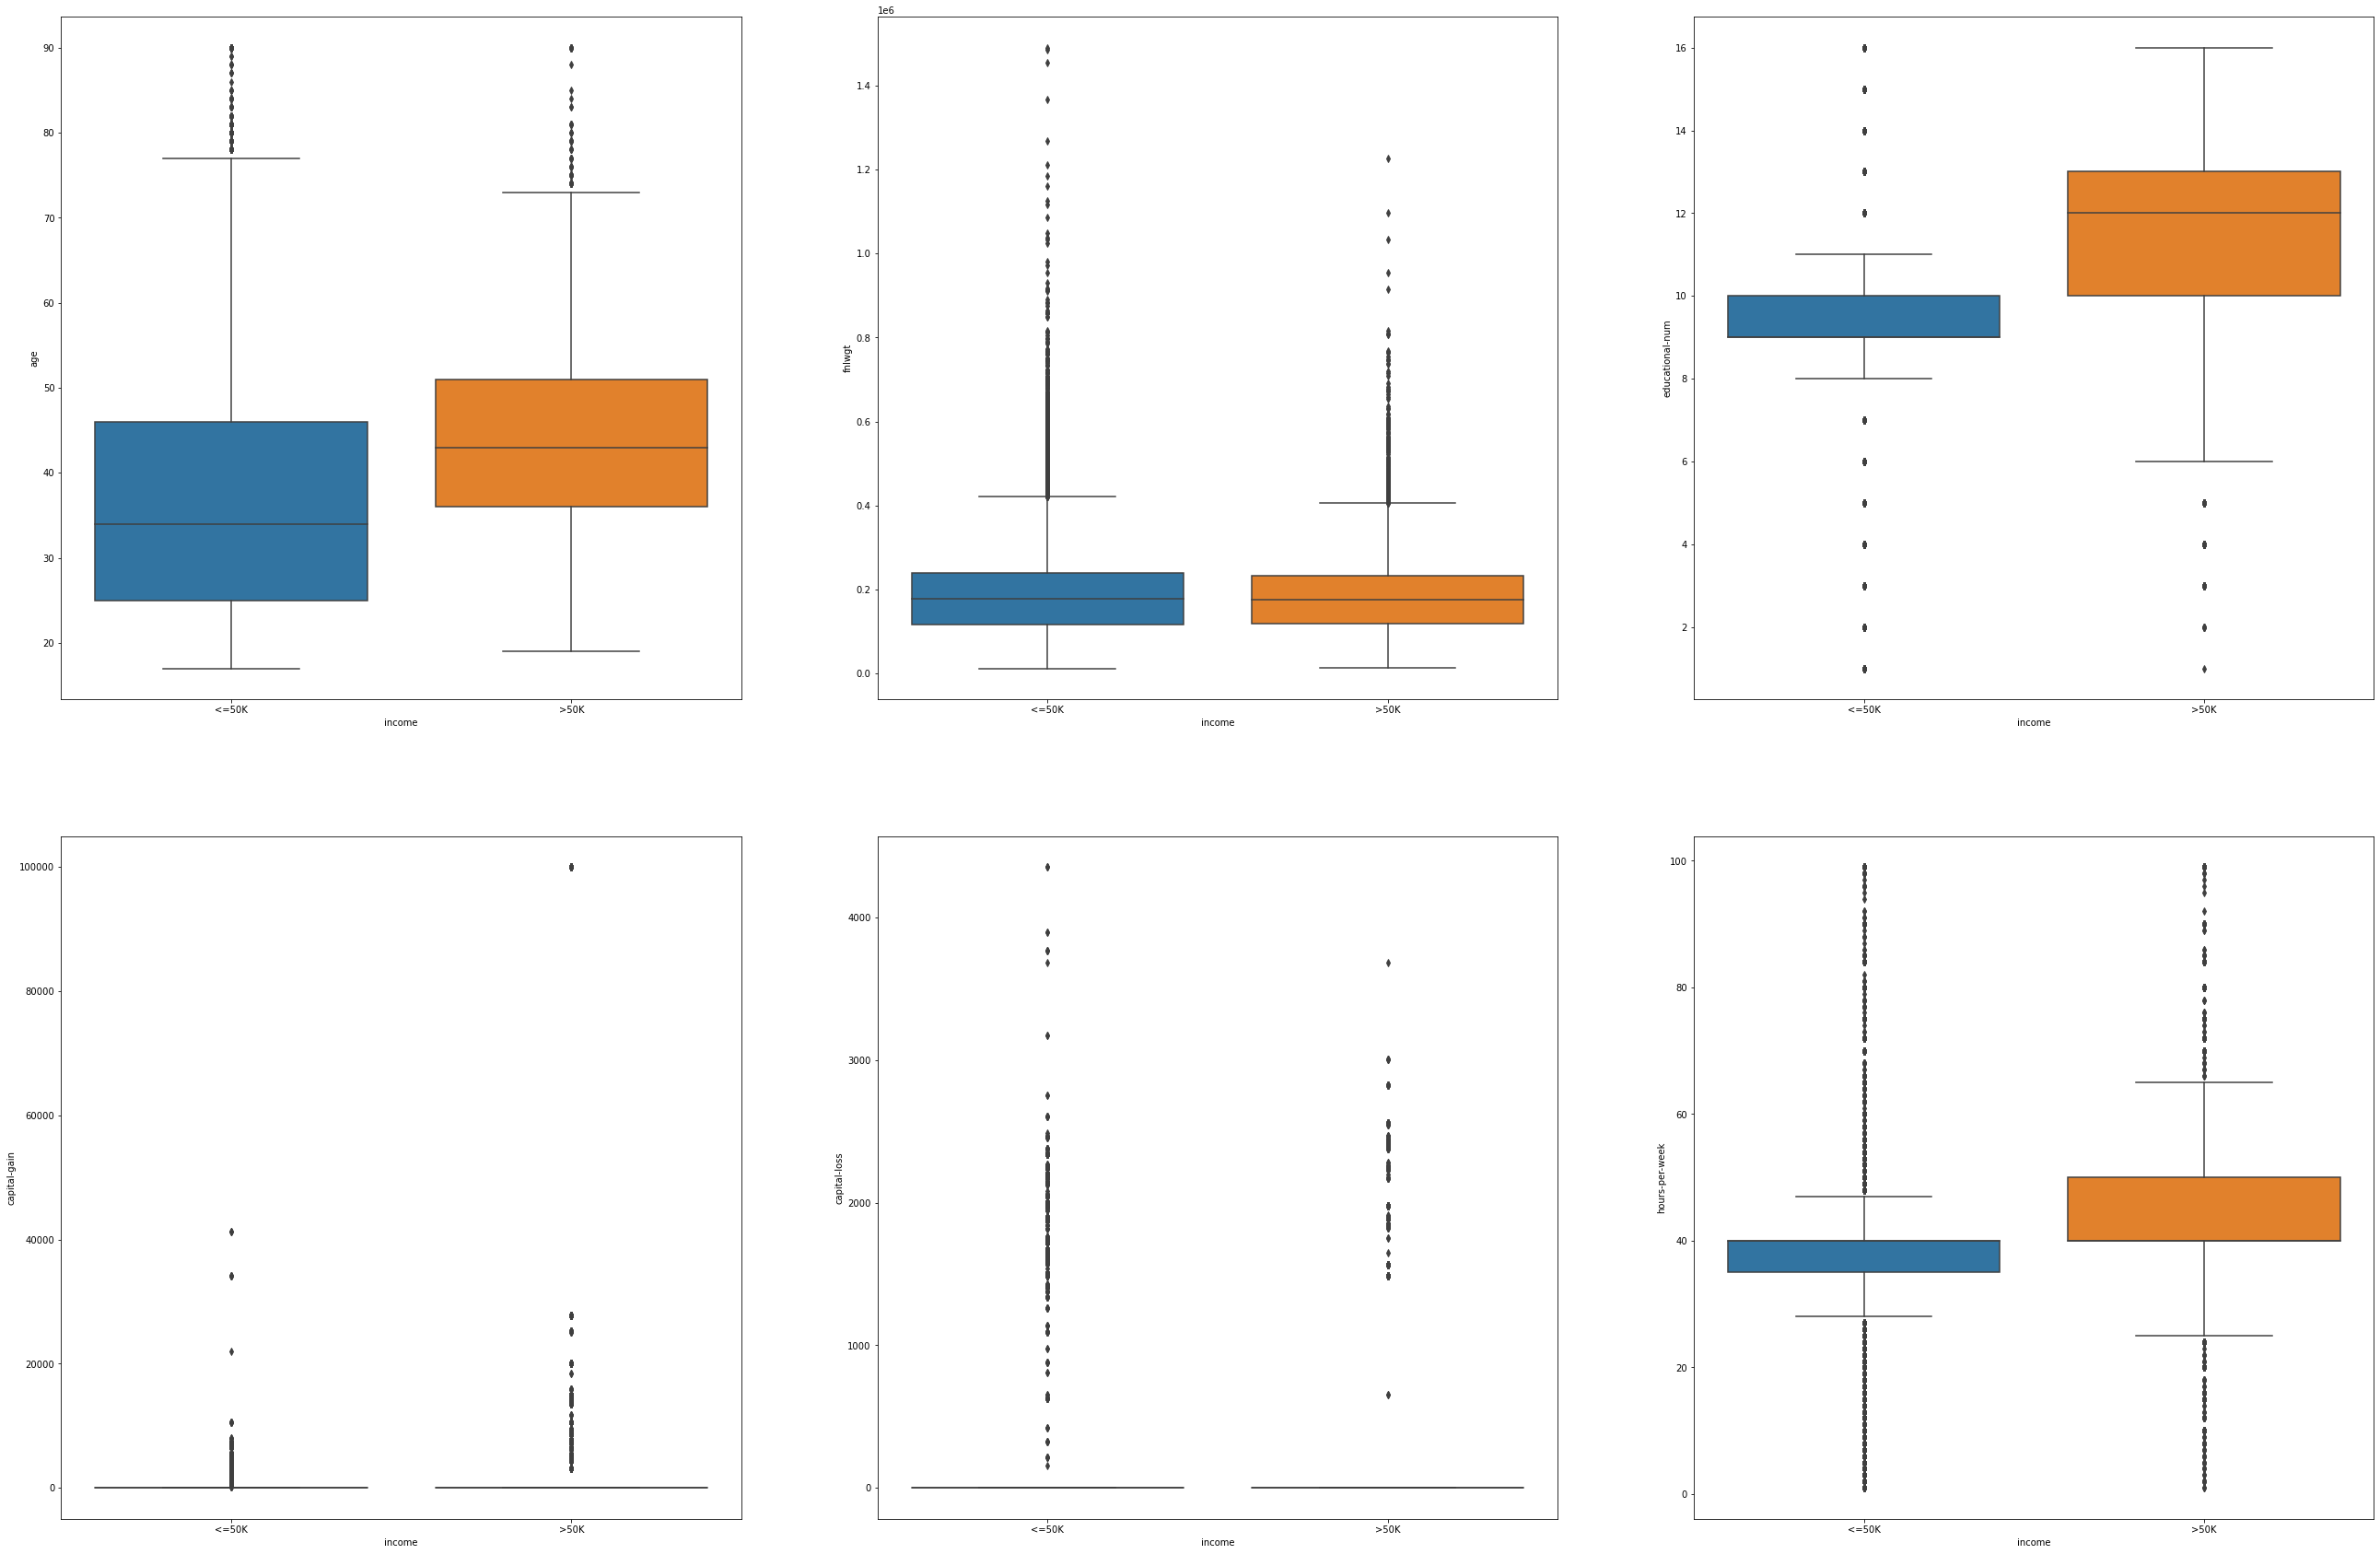

In [16]:
f, ax = plt.subplots(2, 3, sharey=False ,figsize=(45, 30))
j = 0
for i in num_col:
    k = int(j / 3)
    t = j % 3
    sns.boxplot(data.loc[:, 'income'],data.loc[:, i], ax=ax[k, t])
    j+=1

plt.show()

#### Most valued feature according to paper 1 that is age and other categorical columns barplot analysis

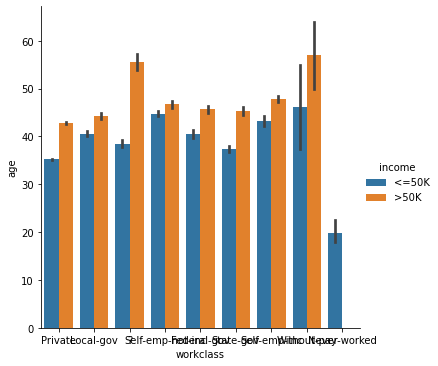

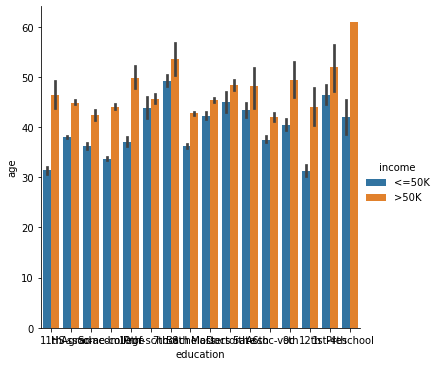

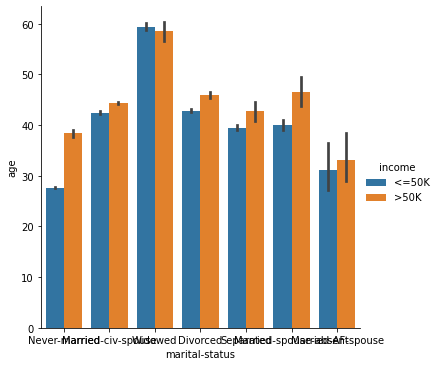

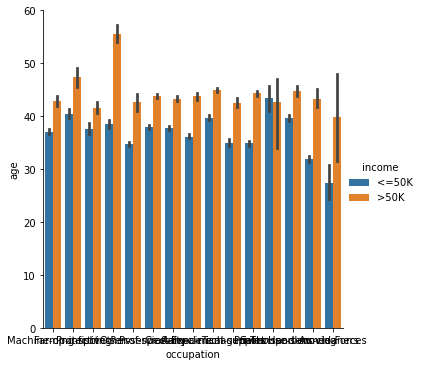

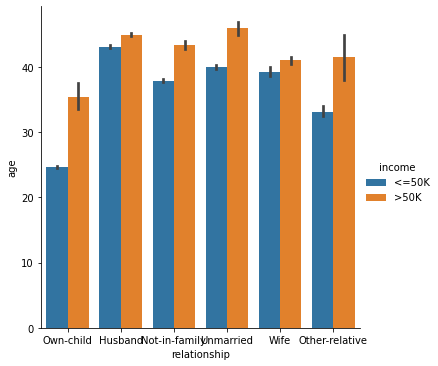

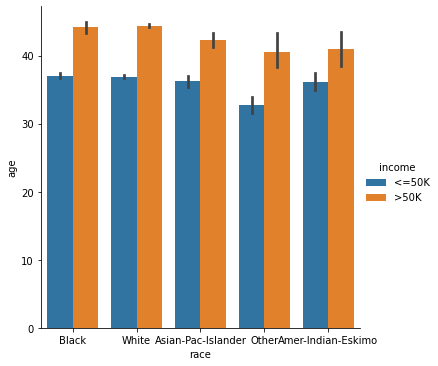

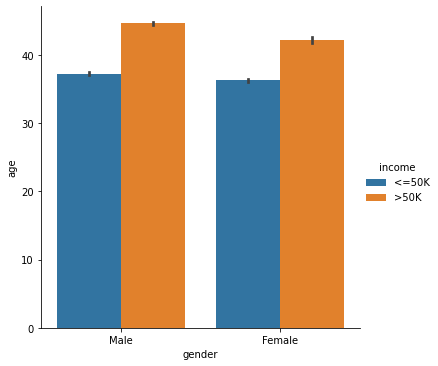

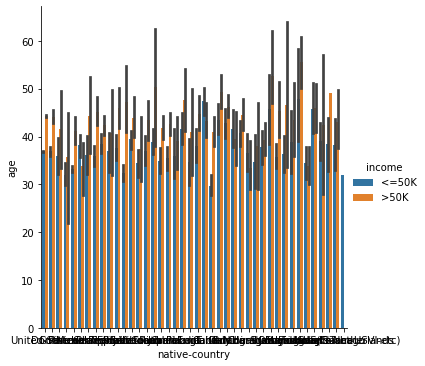

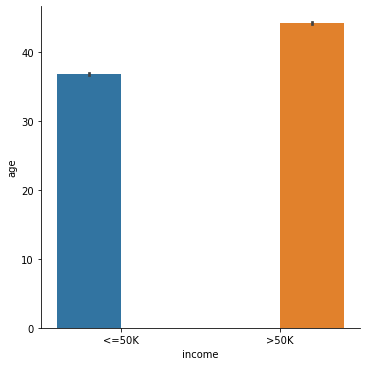

In [21]:
for i in cat_df.columns:

    sns.catplot(x=i, y='age', hue="income", kind="bar", data=data, ax=ax[k, t])


    plt.show()

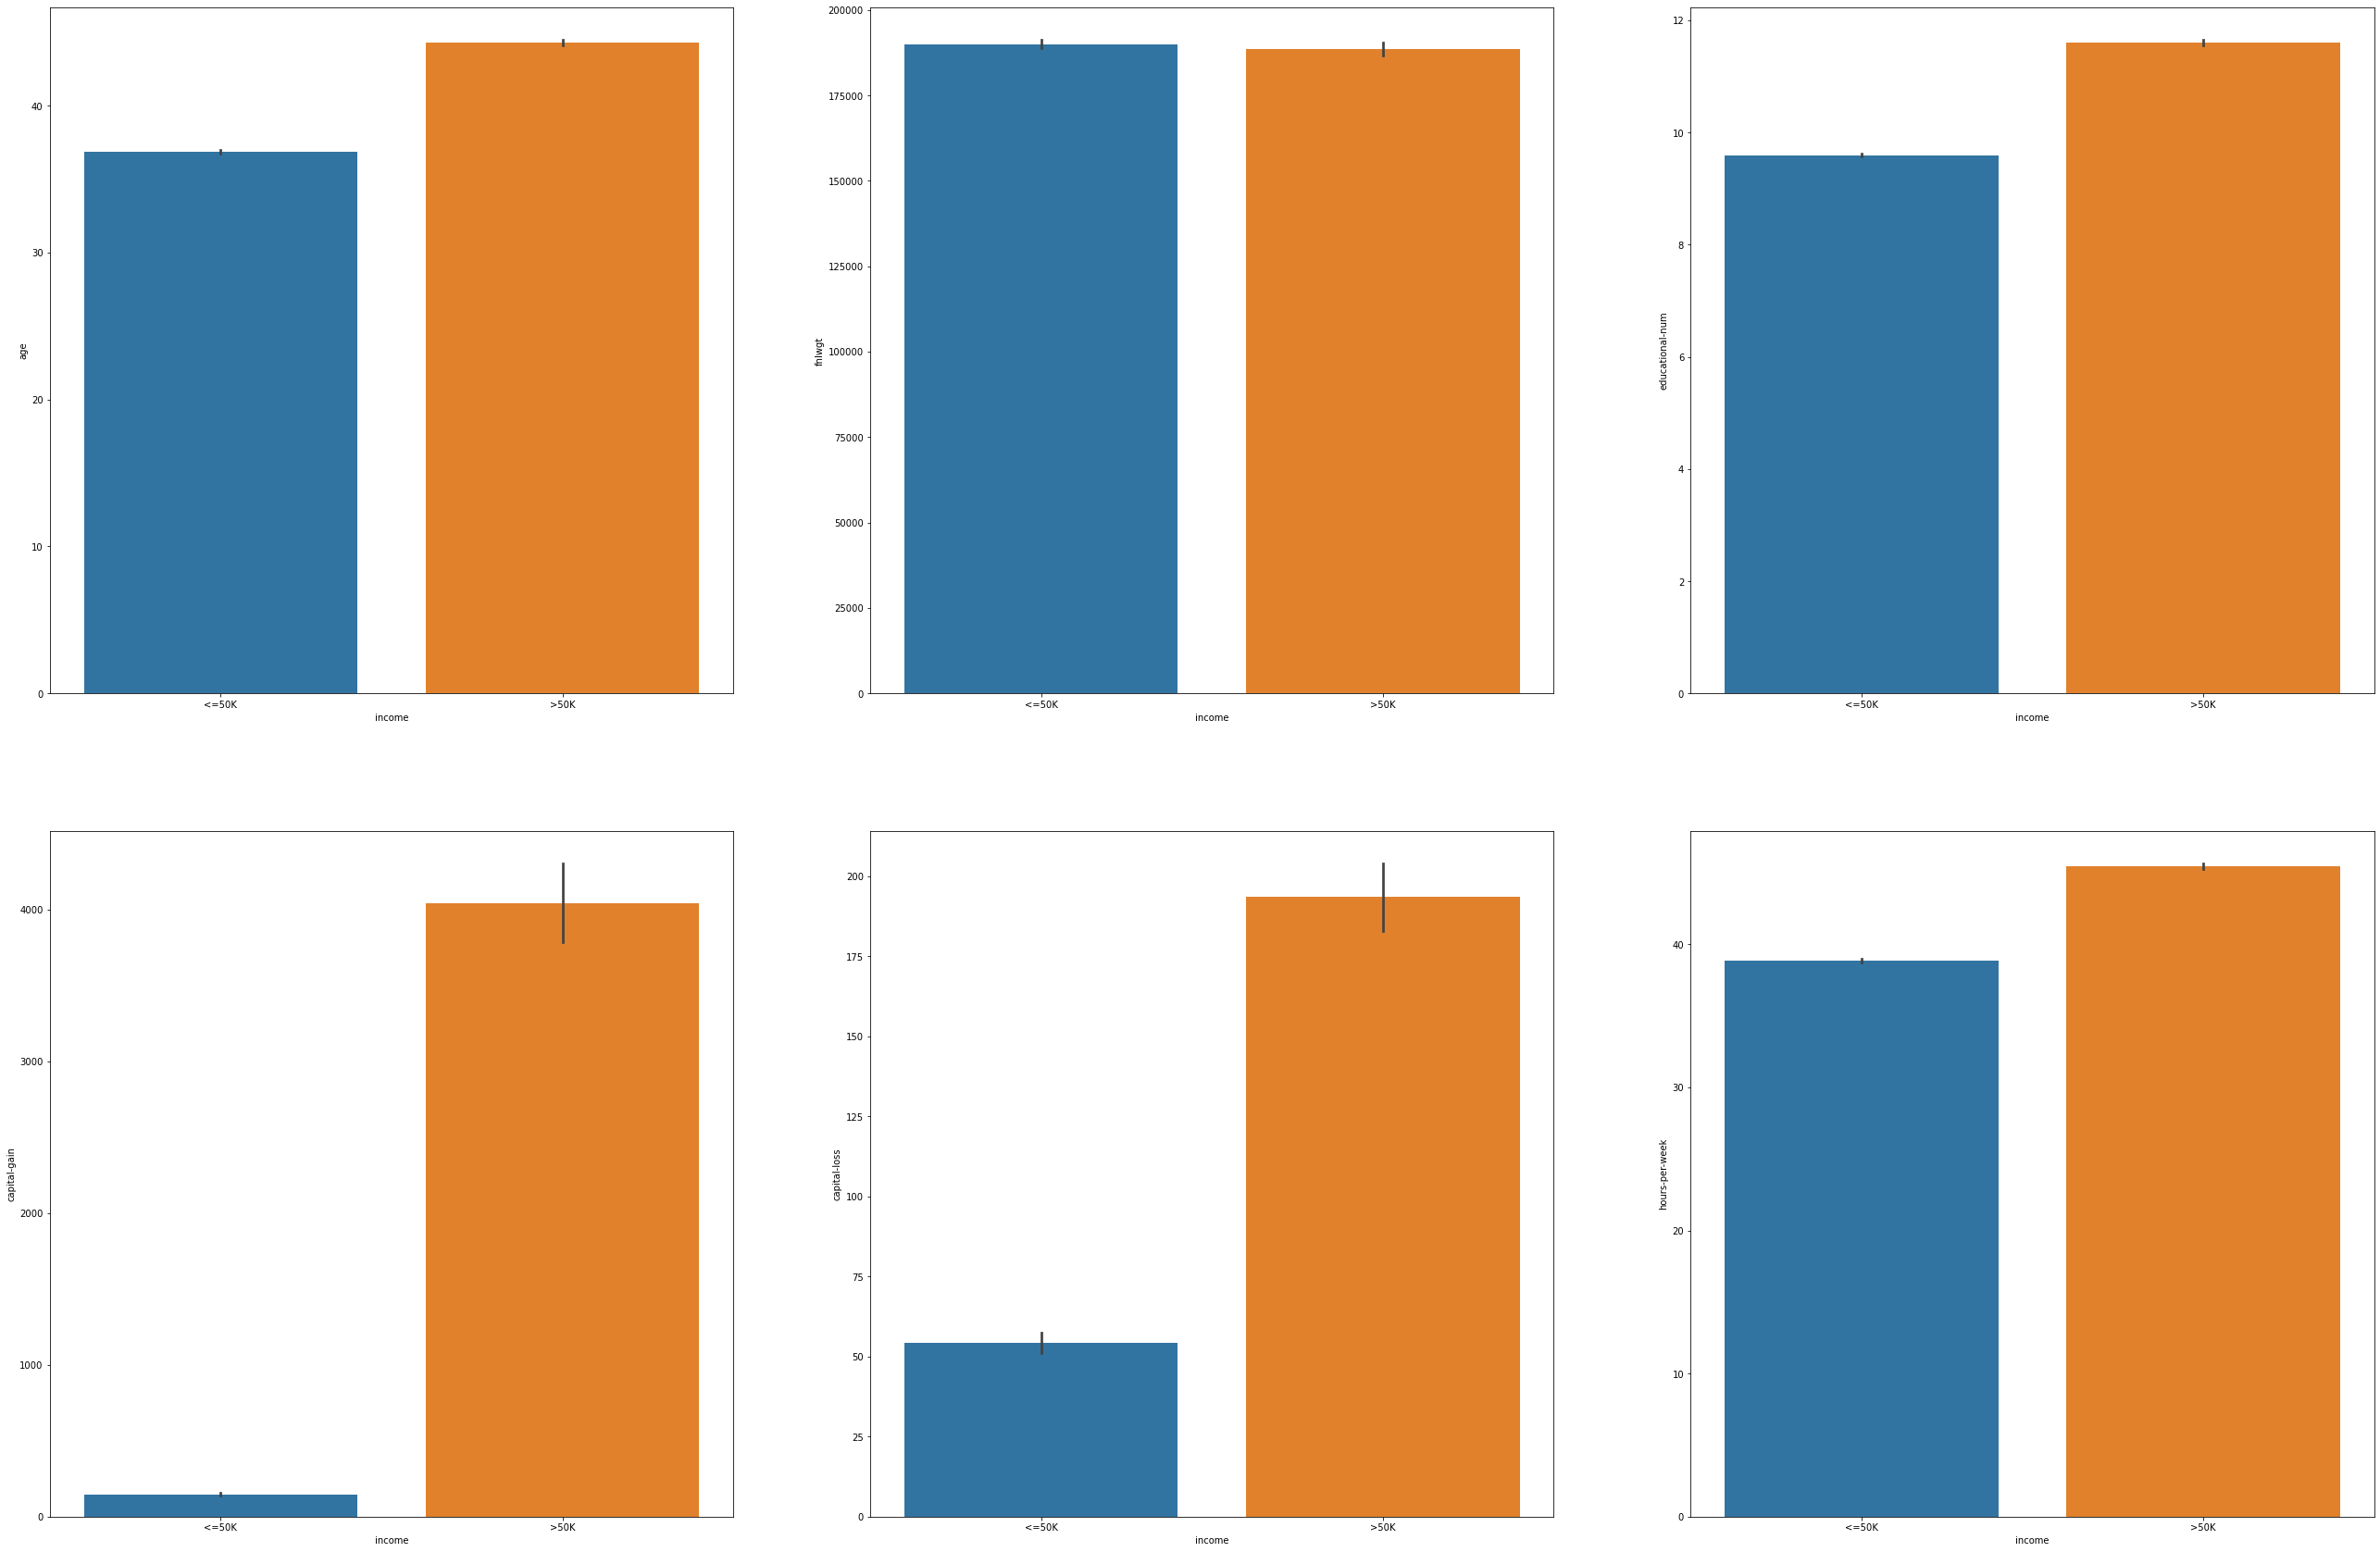

In [17]:
f, ax = plt.subplots(2, 3, sharey=False ,figsize=(45, 30))
j = 0
for i in num_col:
    k = int(j / 3)
    t = j % 3
    sns.barplot(data.loc[:, 'income'],data.loc[:, i], ax=ax[k, t])
    j+=1

plt.show()

## Removing Outliers using IQR method 

In [23]:
for col in ['age',
 'fnlwgt',
 'educational-num',
 'hours-per-week']:
    median = data[col].median()
    out=[]
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in range(len(data[col])):
#         print( data.loc[i,col])
        if data.loc[i,col] > Upper_tail or data.loc[i,col] < Lower_tail:
            out.append(data.loc[i,col])
           
            data.loc[i,col] = np.nan


### Filling it with median values of rest of data

In [26]:
for col in ['age', 'fnlwgt', 'educational-num', 'hours-per-week']:
    median = data[col].median()
    data[col].fillna(value=median, inplace=True)

In [27]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25.0,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40.0,United-States,<=50K
1,38.0,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50.0,United-States,<=50K
2,28.0,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40.0,United-States,>50K
3,44.0,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40.0,United-States,>50K
4,18.0,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0,0,40.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27.0,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38.0,United-States,<=50K
48838,40.0,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40.0,United-States,>50K
48839,58.0,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40.0,United-States,<=50K
48840,22.0,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0,0,40.0,United-States,<=50K


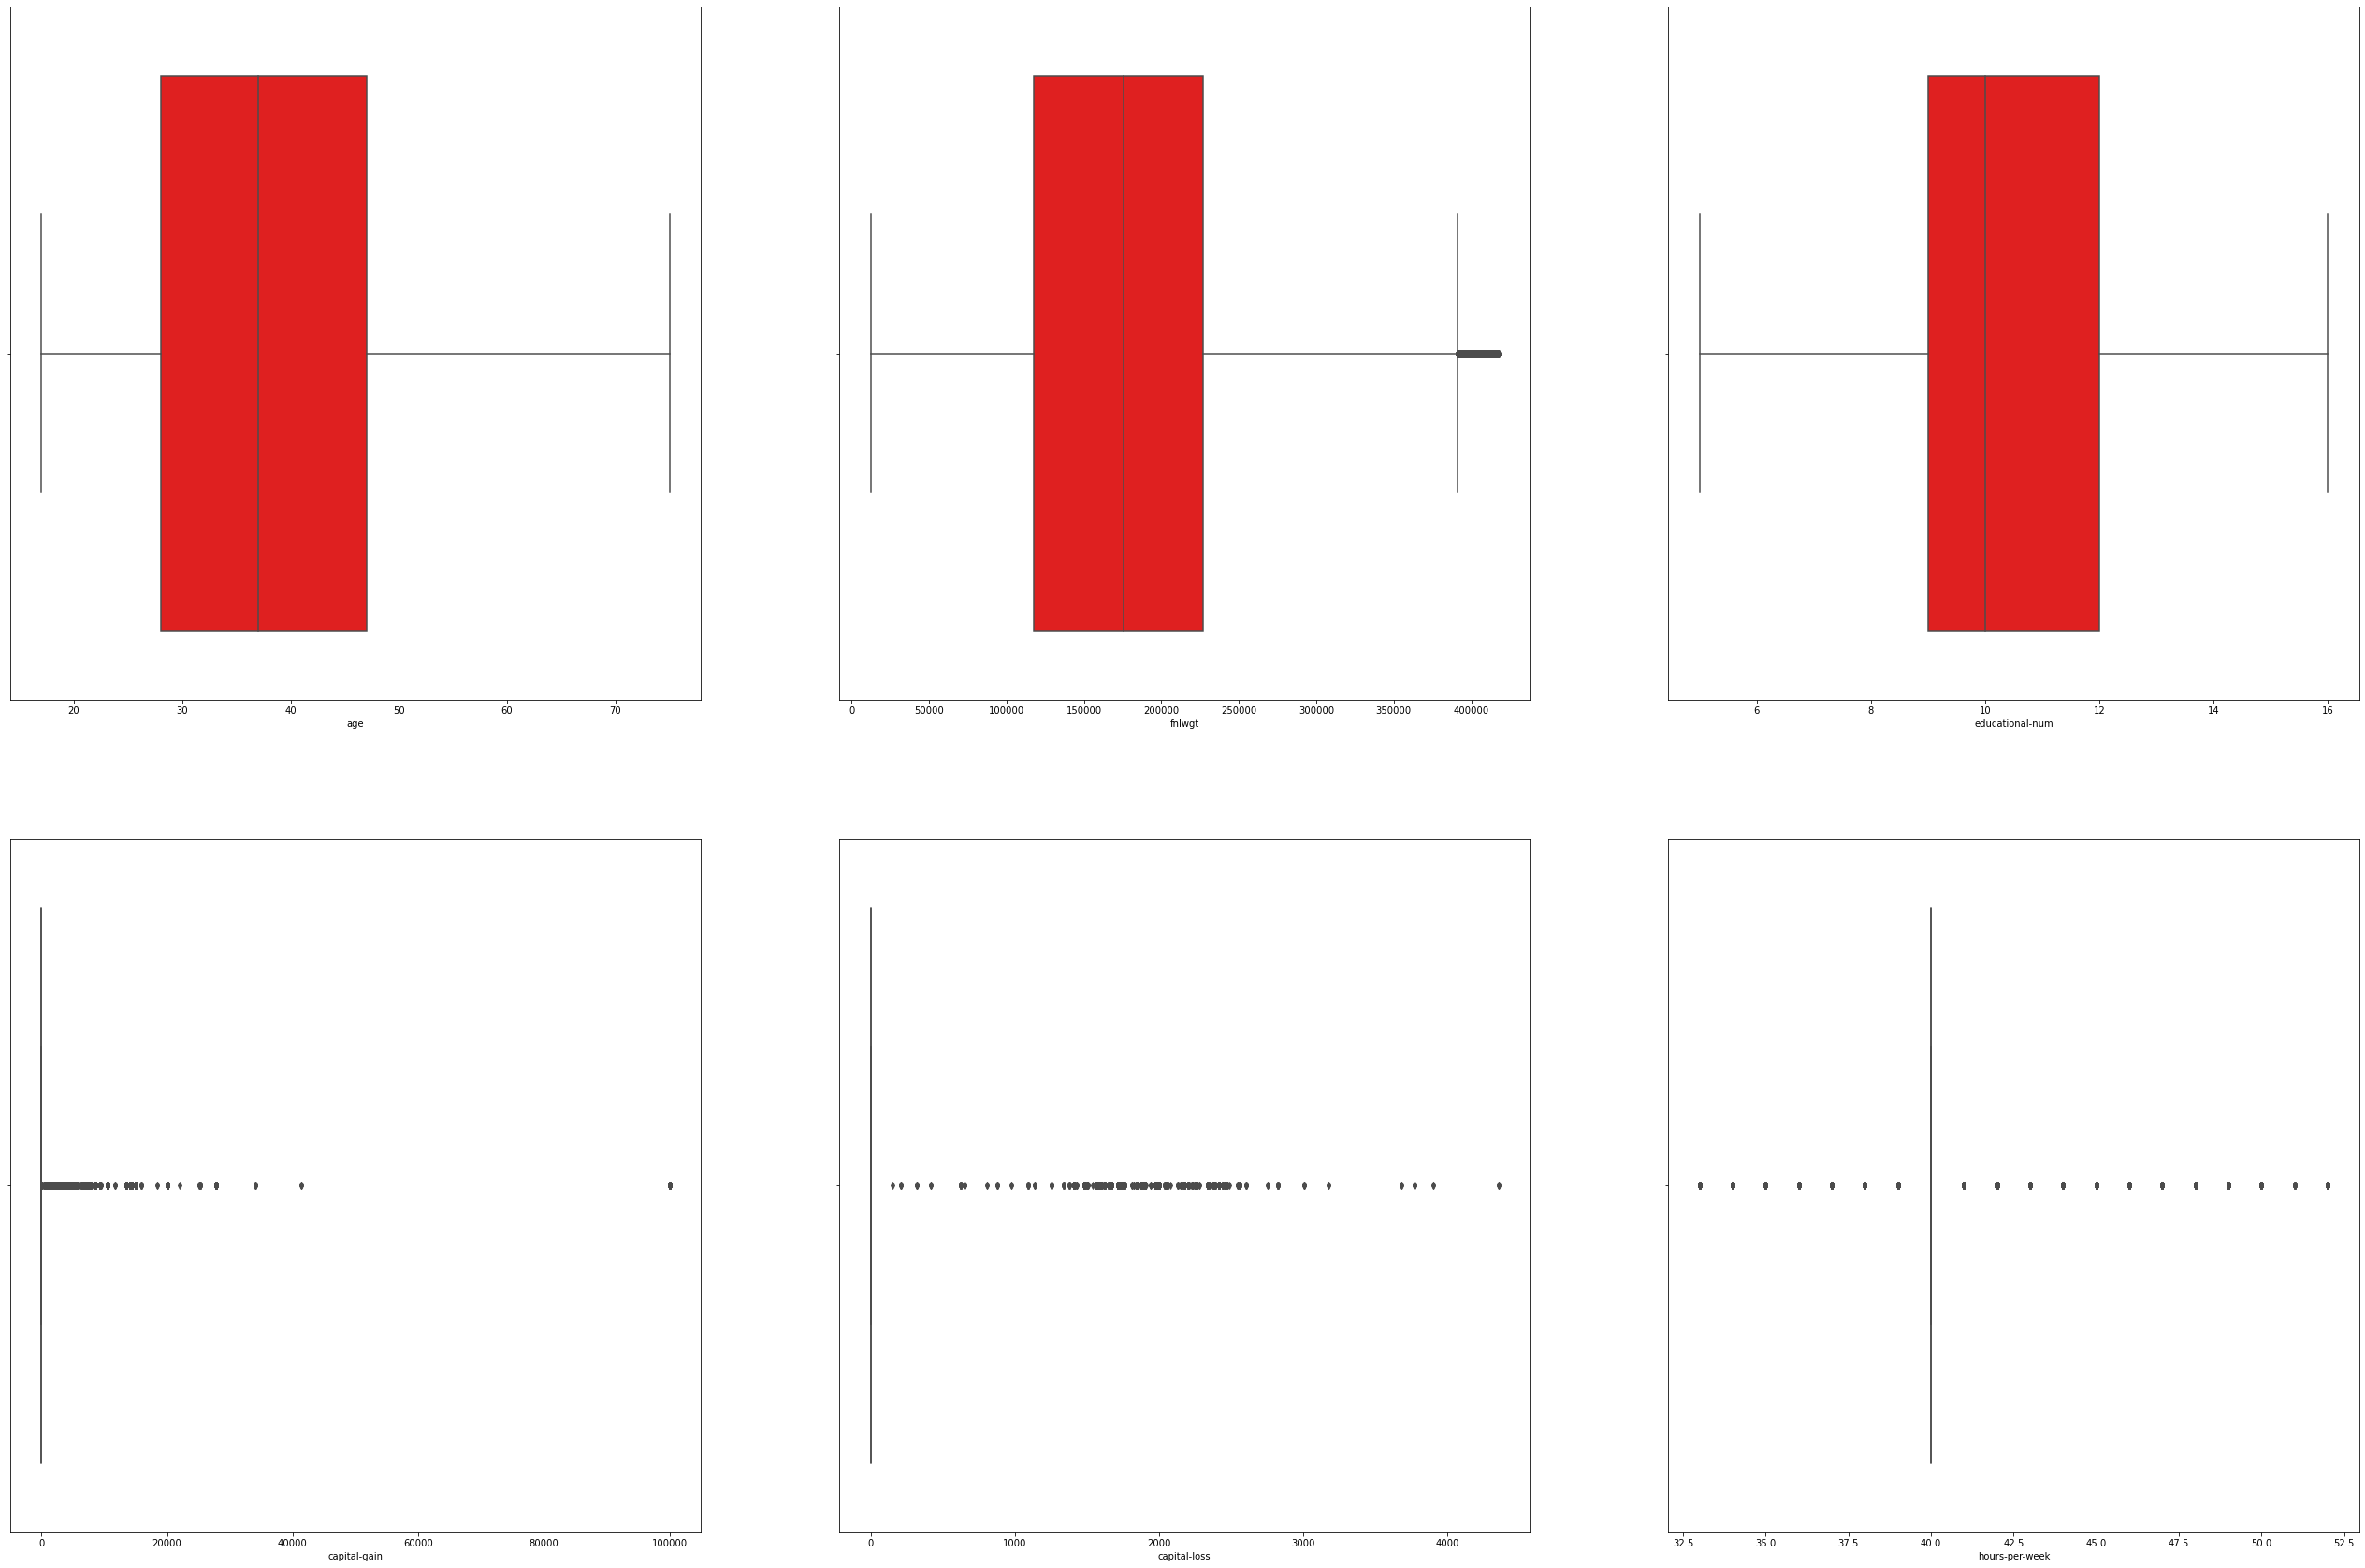

In [28]:
f, ax = plt.subplots(2, 3, sharey=False ,figsize=(45, 30))
j = 0
for i in num_col:
    k = int(j / 3)
    t = j % 3
    sns.boxplot(data.loc[:, i], ax=ax[k, t],color='red')
    j+=1

plt.show()

### Handling Missing Data

In [33]:
data.replace('?',np.nan ,inplace=True)

In [34]:
cat_df.loc[:,'income'].mode()[0]

'<=50K'

In [35]:
data = data.fillna(data.mode().iloc[0])

In [36]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25.0,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40.0,United-States,<=50K
1,38.0,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50.0,United-States,<=50K
2,28.0,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40.0,United-States,>50K
3,44.0,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40.0,United-States,>50K
4,18.0,Private,103497.0,Some-college,10.0,Never-married,Prof-specialty,Own-child,White,Female,0,0,40.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27.0,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38.0,United-States,<=50K
48838,40.0,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40.0,United-States,>50K
48839,58.0,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40.0,United-States,<=50K
48840,22.0,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0,0,40.0,United-States,<=50K


### Data Preprocessing

In [38]:
X_cat = data.iloc[:, [1,3,5,6,7,8,9,13]].values
X_num = data.iloc[:,[0,2,4,10,11,12]].values
y = data.iloc[:, -1].values
X_cat.shape

(48842, 8)

#### One Hot Encoding Categorical Data

In [39]:
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse=False),[0,1,2,3,4,5,6,7])], remainder='passthrough',)
X_cat = np.array(ct.fit_transform(X_cat))

#### Scaling Numerical Data

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_num = sc.fit_transform(X_num)
X_num

array([[-1.00850047,  0.5471311 , -1.51174382, -0.14480353, -0.2171271 ,
        -0.32426031],
       [-0.02344325, -1.0398027 , -0.60217976, -0.14480353, -0.2171271 ,
         2.54075568],
       [-0.78117957,  1.82314923,  0.76216634, -0.14480353, -0.2171271 ,
        -0.32426031],
       ...,
       [ 1.49202939, -0.32045326, -0.60217976, -0.14480353, -0.2171271 ,
        -0.32426031],
       [-1.23582136,  0.25390492, -0.60217976, -0.14480353, -0.2171271 ,
        -0.32426031],
       [ 1.03738759,  1.25523202, -0.60217976,  1.87131501, -0.2171271 ,
        -0.32426031]])

In [41]:
X =np.concatenate((X_cat, X_num), axis=1)
X

array([[ 0.        ,  0.        ,  0.        , ..., -0.14480353,
        -0.2171271 , -0.32426031],
       [ 0.        ,  0.        ,  0.        , ..., -0.14480353,
        -0.2171271 ,  2.54075568],
       [ 0.        ,  1.        ,  0.        , ..., -0.14480353,
        -0.2171271 , -0.32426031],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.14480353,
        -0.2171271 , -0.32426031],
       [ 0.        ,  0.        ,  0.        , ..., -0.14480353,
        -0.2171271 , -0.32426031],
       [ 0.        ,  0.        ,  0.        , ...,  1.87131501,
        -0.2171271 , -0.32426031]])

#### Shuffling Data

In [42]:
from sklearn.utils import shuffle
X,y = shuffle(X,y)

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [44]:
y

array([0, 1, 0, ..., 0, 0, 1])

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [48]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 4)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [57]:
y_pred = classifier.predict(X_test)

In [58]:
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
print(f1,acc)

0.5717197452229299 0.8279250690961204


In [51]:
from sklearn.linear_model import LogisticRegression
clf1 =  LogisticRegression()
clf1.fit(X_train, y_train)

LogisticRegression()

In [59]:
y_pred = clf1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
print(f1,acc)

0.6599766627771295 0.8508547446002661


In [53]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

### For comparison purposes with notebook 2 - According to research paper

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
clf2 =  GradientBoostingClassifier(n_estimators=250, learning_rate=0.1, max_depth=4, random_state=0)
clf2.fit(X_train, y_train)


GradientBoostingClassifier(max_depth=4, n_estimators=250, random_state=0)

In [60]:
y_pred = clf2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test,y_pred)
print(f1,acc)

0.6599766627771295 0.8734773262360528
